In [38]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.patches as mpatches
import numpy as np
import os
import seaborn as sns

In [39]:
#creating folder to save the plots
output_dir = "../analytics/output"
os.makedirs(output_dir, exist_ok=True)


In [40]:
#creating EXCEL output file
excel_file_general_stat_2024 = "../analytics/output/clear_cuts_stats_2024.xlsx"

# Load Dataset

In [41]:
#Clear cuts (all clear cuts)
clear_cuts: gpd.GeoDataFrame = gpd.read_file("../analytics/data/abusive_clear_cuts/abusive_clear_cuts_v3_2024.fgb")
clear_cuts

,date_min,date_max,days_delta,clear_cut_group_size,area_ha,natura2000_area_ha,slope30_area_ha,department_code_insee,city_code_insee,centroid_x,centroid_y,representative_point_x,representative_point_y,geometry
0,2024-09-05,2024-11-10,66,17,2.190015,0.000000,0.000000,2A,2A288,1.219669e+06,6.071563e+06,1.219630e+06,6.071627e+06,"MULTIPOLYGON (((1219699.689 6071376.697, 12196..."
1,2024-07-07,2024-12-04,150,17,1.200007,0.000000,0.000000,2A,2A114,1.211863e+06,6.069443e+06,1.211850e+06,6.069442e+06,"MULTIPOLYGON (((1211799.689 6069346.697, 12117..."
2,2024-01-15,2024-09-06,235,11,0.700005,0.000000,0.000000,2A,2A300,1.212226e+06,6.089665e+06,1.212230e+06,6.089667e+06,"MULTIPOLYGON (((1212189.688 6089636.697, 12121..."
3,2024-07-20,2024-09-29,71,8,0.520004,0.000000,0.000000,2B,2B342,1.232212e+06,6.111233e+06,1.232210e+06,6.111237e+06,"MULTIPOLYGON (((1232169.688 6111236.697, 12321..."
4,2024-01-22,2024-04-03,72,6,0.500004,0.500004,0.000000,2B,2B123,1.236758e+06,6.125014e+06,1.236755e+06,6.125012e+06,"MULTIPOLYGON (((1236779.689 6124966.697, 12367..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18496,2024-04-03,2024-09-12,162,20,1.190008,0.379821,0.054707,64,64504,3.261412e+05,6.253813e+06,3.261347e+05,6.253817e+06,"MULTIPOLYGON (((326049.689 6253756.697, 326049..."
18497,2024-04-08,2024-11-11,217,13,0.830005,0.124583,0.000000,64,64495,3.313989e+05,6.259533e+06,3.313997e+05,6.259527e+06,"MULTIPOLYGON (((331369.689 6259456.697, 331369..."
18498,2024-08-01,2024-09-24,54,14,0.680006,0.287286,0.123943,64,64495,3.329729e+05,6.256867e+06,3.329597e+05,6.256867e+06,"MULTIPOLYGON (((332929.689 6256806.697, 332929..."
18499,2024-04-21,2024-11-06,199,15,0.820005,0.631942,0.000000,64,64504,3.277902e+05,6.253615e+06,3.277947e+05,6.253617e+06,"MULTIPOLYGON (((327739.688 6253586.697, 327729..."


In [42]:
#code department regions 
# https://www.data.gouv.fr/fr/datasets/departements-de-france/
code_dpt_regions=pd.read_csv("../analytics/data/cadastre/departements-france.csv")
code_dpt_regions

,code_departement,nom_departement,code_region,nom_region
0,01,Ain,84,Auvergne-Rhône-Alpes
1,02,Aisne,32,Hauts-de-France
2,03,Allier,84,Auvergne-Rhône-Alpes
3,04,Alpes-de-Haute-Provence,93,Provence-Alpes-Côte d'Azur
4,05,Hautes-Alpes,93,Provence-Alpes-Côte d'Azur
...,...,...,...,...
96,971,Guadeloupe,1,Guadeloupe
97,972,Martinique,2,Martinique
98,973,Guyane,3,Guyane
99,974,La Réunion,4,La Réunion


## adding region names to the data base 

In [43]:
clear_cuts['department_code_insee'] = clear_cuts['department_code_insee'].replace(['69D', '69M'], '69') #= rhône
clear_cuts=clear_cuts.merge(code_dpt_regions, left_on='department_code_insee', right_on='code_departement', how='left')
clear_cuts


,date_min,date_max,days_delta,clear_cut_group_size,area_ha,natura2000_area_ha,slope30_area_ha,department_code_insee,city_code_insee,centroid_x,centroid_y,representative_point_x,representative_point_y,geometry,code_departement,nom_departement,code_region,nom_region
0,2024-09-05,2024-11-10,66,17,2.190015,0.000000,0.000000,2A,2A288,1.219669e+06,6.071563e+06,1.219630e+06,6.071627e+06,"MULTIPOLYGON (((1219699.689 6071376.697, 12196...",2A,Corse-du-Sud,94,Corse
1,2024-07-07,2024-12-04,150,17,1.200007,0.000000,0.000000,2A,2A114,1.211863e+06,6.069443e+06,1.211850e+06,6.069442e+06,"MULTIPOLYGON (((1211799.689 6069346.697, 12117...",2A,Corse-du-Sud,94,Corse
2,2024-01-15,2024-09-06,235,11,0.700005,0.000000,0.000000,2A,2A300,1.212226e+06,6.089665e+06,1.212230e+06,6.089667e+06,"MULTIPOLYGON (((1212189.688 6089636.697, 12121...",2A,Corse-du-Sud,94,Corse
3,2024-07-20,2024-09-29,71,8,0.520004,0.000000,0.000000,2B,2B342,1.232212e+06,6.111233e+06,1.232210e+06,6.111237e+06,"MULTIPOLYGON (((1232169.688 6111236.697, 12321...",2B,Haute-Corse,94,Corse
4,2024-01-22,2024-04-03,72,6,0.500004,0.500004,0.000000,2B,2B123,1.236758e+06,6.125014e+06,1.236755e+06,6.125012e+06,"MULTIPOLYGON (((1236779.689 6124966.697, 12367...",2B,Haute-Corse,94,Corse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18496,2024-04-03,2024-09-12,162,20,1.190008,0.379821,0.054707,64,64504,3.261412e+05,6.253813e+06,3.261347e+05,6.253817e+06,"MULTIPOLYGON (((326049.689 6253756.697, 326049...",64,Pyrénées-Atlantiques,75,Nouvelle-Aquitaine
18497,2024-04-08,2024-11-11,217,13,0.830005,0.124583,0.000000,64,64495,3.313989e+05,6.259533e+06,3.313997e+05,6.259527e+06,"MULTIPOLYGON (((331369.689 6259456.697, 331369...",64,Pyrénées-Atlantiques,75,Nouvelle-Aquitaine
18498,2024-08-01,2024-09-24,54,14,0.680006,0.287286,0.123943,64,64495,3.329729e+05,6.256867e+06,3.329597e+05,6.256867e+06,"MULTIPOLYGON (((332929.689 6256806.697, 332929...",64,Pyrénées-Atlantiques,75,Nouvelle-Aquitaine
18499,2024-04-21,2024-11-06,199,15,0.820005,0.631942,0.000000,64,64504,3.277902e+05,6.253615e+06,3.277947e+05,6.253617e+06,"MULTIPOLYGON (((327739.688 6253586.697, 327729...",64,Pyrénées-Atlantiques,75,Nouvelle-Aquitaine


## Selecting abusive clearcuts

A clear-cut is considered abusive if it meets one of the following criteria:
- Its surface area is ≥ 10 ha
- It includes a cutting area ≥ 2 ha on a slope ≥ 30 %.
- It includes a cutting area ≥ 2 ha located within a Natura 2000 area

In [44]:
# selecting abusive clear cuts with all criterias
abusive_clear_cuts: gpd.GeoDataFrame = clear_cuts[
    (clear_cuts["area_ha"] >= 10)
    | (clear_cuts["natura2000_area_ha"] >=2)
    | (clear_cuts["slope30_area_ha"] >= 2)
]
abusive_clear_cuts.sort_values('date_min', ascending=True, inplace=True) 
abusive_clear_cuts


C:\Users\User\AppData\Local\Temp\ipykernel_21928\2701074556.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abusive_clear_cuts.sort_values('date_min', ascending=True, inplace=True)


,date_min,date_max,days_delta,clear_cut_group_size,area_ha,natura2000_area_ha,slope30_area_ha,department_code_insee,city_code_insee,centroid_x,centroid_y,representative_point_x,representative_point_y,geometry,code_departement,nom_departement,code_region,nom_region
803,2024-01-01,2024-11-14,318,83,7.630021,0.000000,2.669291,07,07208,822332.080388,6.382072e+06,822379.688542,6.382047e+06,"MULTIPOLYGON (((822259.688 6381766.697, 822249...",07,Ardèche,84,Auvergne-Rhône-Alpes
11690,2024-01-04,2024-08-07,216,131,11.700021,0.000000,0.000000,40,40184,362649.859484,6.356930e+06,362644.688542,6.356957e+06,"MULTIPOLYGON (((362539.689 6356806.697, 362539...",40,Landes,75,Nouvelle-Aquitaine
15856,2024-01-05,2024-09-30,269,176,16.230026,0.000000,0.000000,47,47221,479922.316405,6.341375e+06,479919.688542,6.341437e+06,"MULTIPOLYGON (((479789.689 6341226.697, 479789...",47,Lot-et-Garonne,75,Nouvelle-Aquitaine
17777,2024-01-05,2024-10-20,289,86,6.370024,0.000000,4.054569,34,34086,673420.010470,6.263867e+06,673339.688542,6.263902e+06,"MULTIPOLYGON (((673329.689 6263796.697, 673329...",34,Hérault,76,Occitanie
9395,2024-01-06,2024-09-19,257,133,10.200043,0.000000,0.000000,49,49333,446023.727998,6.730534e+06,445884.688542,6.730542e+06,"MULTIPOLYGON (((446299.688 6730616.697, 446299...",49,Maine-et-Loire,52,Pays de la Loire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497,2024-09-16,2024-10-15,29,25,2.580018,2.580018,0.059584,43,43211,789438.603323,6.457949e+06,789404.688542,6.457942e+06,"MULTIPOLYGON (((789459.689 6457856.697, 789469...",43,Haute-Loire,84,Auvergne-Rhône-Alpes
6998,2024-10-02,2024-11-03,32,27,3.200017,3.200017,0.000000,39,39149,910618.969825,6.666181e+06,910654.688542,6.666187e+06,"MULTIPOLYGON (((910749.688 6666196.697, 910749...",39,Jura,27,Bourgogne-Franche-Comté
313,2024-10-03,2024-12-26,84,23,2.010012,2.010012,1.906620,13,13100,849831.504472,6.297739e+06,849844.688542,6.297742e+06,"MULTIPOLYGON (((849749.689 6297706.697, 849749...",13,Bouches-du-Rhône,93,Provence-Alpes-Côte d'Azur
3691,2024-10-21,2024-11-03,13,11,2.980014,2.980014,0.000000,01,01208,915943.178457,6.525725e+06,915904.688542,6.525717e+06,"MULTIPOLYGON (((915829.689 6525566.697, 915829...",01,Ain,84,Auvergne-Rhône-Alpes


# General statistics

In [45]:
#Number of clear cuts 
#general statistics
stats = abusive_clear_cuts[["area_ha", "days_delta", "natura2000_area_ha", "slope30_area_ha"]].describe()

#rounding function
def custom_round(val):
    if val % 1 == 0:  
        return f"{int(val)}"  # without decimal point
    else:
        return f"{val:.2f}"  # 2 decimals

# rounding figures
stats = stats.applymap(custom_round)
stats


C:\Users\User\AppData\Local\Temp\ipykernel_21928\3870608020.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  stats = stats.applymap(custom_round)


,area_ha,days_delta,natura2000_area_ha,slope30_area_ha
count,678,678,678,678
mean,6.63,177.59,2.07,0.89
std,5.96,61.94,2.44,1.64
min,2.00,13,0,0
25%,2.72,132,0,0
50%,3.95,180,2.15,0
75%,9.77,222.50,3.22,1.71
max,51.63,353,19.38,14.16


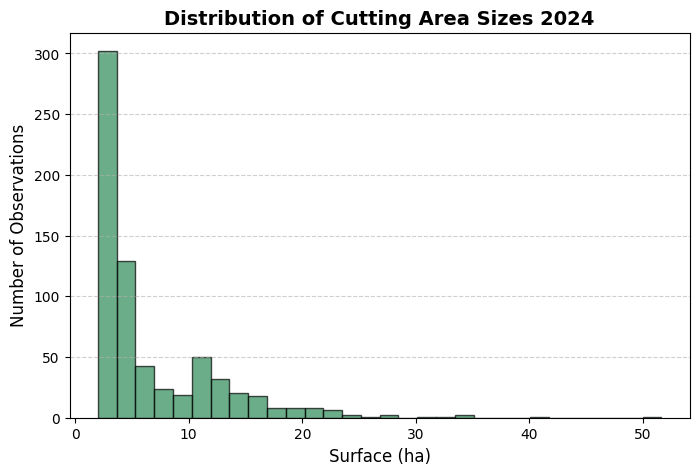

In [46]:
#distribution of clear-cut areas
plt.figure(figsize=(8, 5))
plt.hist(abusive_clear_cuts["area_ha"], bins=30, edgecolor="black", alpha=0.7, color="seagreen")
plt.title("Distribution of Cutting Area Sizes 2024", fontsize=14, fontweight="bold")
plt.xlabel("Surface (ha)", fontsize=12)
plt.ylabel("Number of Observations", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.6)
#saving the plot
file_path = os.path.join(output_dir, "hist_size_clear_cuts_2024.png")
plt.savefig(file_path, dpi=300)
plt.show()

# Number of clear cuts for each criteria 

In [47]:
# nbr of abusive clearcuts total
nb_total = len(abusive_clear_cuts)

# nbr of abusive clear cuts natura 2000 criteria
nb_natura_2000 = ((abusive_clear_cuts["natura2000_area_ha"] >= 2) & (abusive_clear_cuts["slope30_area_ha"] < 2) & (abusive_clear_cuts["area_ha"]<10)).sum()

# nbr of abusive clear cuts slope >30% criteria
nb_slope_30 = ((abusive_clear_cuts["natura2000_area_ha"] < 2) & (abusive_clear_cuts["slope30_area_ha"] >= 2) & (abusive_clear_cuts["area_ha"]<10)).sum()

# nbr clear cuts more than 10 ha
nb_10_ha=((abusive_clear_cuts["natura2000_area_ha"] < 2) & (abusive_clear_cuts["slope30_area_ha"] < 2) & (abusive_clear_cuts["area_ha"]>=10)).sum()

#nbr clear cuts natura 2000 & slope 30%
nb_natura_2000_slope_30=((abusive_clear_cuts["natura2000_area_ha"] >=2) & (abusive_clear_cuts["slope30_area_ha"] >= 2) & (abusive_clear_cuts["area_ha"]<10)).sum()

#nbr clear cuts natura 2000 & area >=10ha
nb_natura_2000_10_ha=((abusive_clear_cuts["natura2000_area_ha"] >=2) & (abusive_clear_cuts["slope30_area_ha"] < 2) & (abusive_clear_cuts["area_ha"]>=10)).sum()

#nbr clear cuts slope 30% & area >=10ha
nb_slope_30_10_ha=((abusive_clear_cuts["natura2000_area_ha"] <0.5) & (abusive_clear_cuts["slope30_area_ha"] >= 2) & (abusive_clear_cuts["area_ha"]>=10)).sum()

#nbr clear cuts meeeting all 3 criteria
nb_all_criteria=((abusive_clear_cuts["natura2000_area_ha"] >=2) & (abusive_clear_cuts["slope30_area_ha"] >= 2) & (abusive_clear_cuts["area_ha"]>=10)).sum()


# creating a new dataframe with the totals
types_counts_abusive_clear_cuts = pd.DataFrame({
    "clear cuts type": ["Natura 2000>=2 ha", "slope >= 30%>= 2 ha", ">=10 ha","Natura 2000 & slope 30%", "Natura 2000 & 10 ha", "10 ha & slope 30%", "All 3 criteria","Total"],
    "Number of clear cuts": [ nb_natura_2000, nb_slope_30, nb_10_ha,nb_natura_2000_slope_30,nb_natura_2000_10_ha,nb_slope_30_10_ha,nb_all_criteria, nb_total]
})
types_counts_abusive_clear_cuts


,clear cuts type,Number of clear cuts
0,Natura 2000>=2 ha,352
1,slope >= 30%>= 2 ha,143
2,>=10 ha,153
3,Natura 2000 & slope 30%,14
4,Natura 2000 & 10 ha,12
5,10 ha & slope 30%,3
6,All 3 criteria,1
7,Total,678


# Beginning of clear cuts during the year 2024


In [48]:
#Time series starting dates clear cuts in 2024 
abusive_clear_cuts["month"] = abusive_clear_cuts["date_min"].dt.month  # keep just the month
clear_cuts_per_month = abusive_clear_cuts.groupby("month").size()
clear_cuts_per_month

c:\Users\User\AppData\Local\pypoetry\Cache\virtualenvs\python-template-vFWxdPwD-py3.13\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


month
1      70
2     167
3     117
4     113
5      73
6      60
7      49
8      19
9       6
10      3
11      1
dtype: int64

In [49]:
#Time series starting dates clear cuts in 2024 
abusive_clear_cuts["month"] = abusive_clear_cuts["date_min"].dt.month  # keep just the month
area_per_month = abusive_clear_cuts.groupby("month")["area_ha"].sum()

c:\Users\User\AppData\Local\pypoetry\Cache\virtualenvs\python-template-vFWxdPwD-py3.13\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


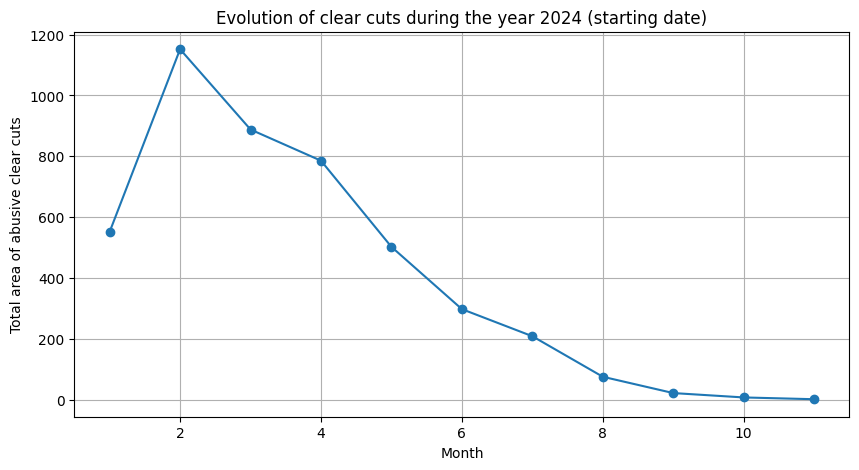

In [50]:
#Creating the graph 
plt.figure(figsize=(10, 5))
plt.plot(clear_cuts_per_month.index, area_per_month.values, marker="o", linestyle="-")
plt.xlabel("Month")
plt.ylabel("Total area of abusive clear cuts")
plt.title("Evolution of clear cuts during the year 2024 (starting date)")
plt.grid()
#saving the plot
file_path = os.path.join(output_dir, "Evolution_of_clear_cuts_area_ha_2024.png")
plt.savefig(file_path, dpi=300)
plt.show()

# Clear cuts per regions

Number of clear-cuts by region during 2024 year

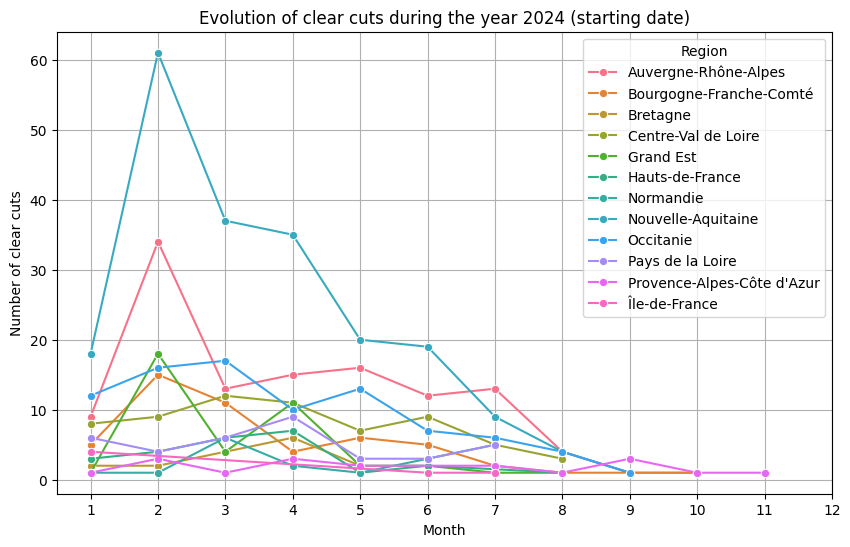

In [51]:
# group by month and regions
clear_cuts_per_month_region = abusive_clear_cuts.groupby(["month", "nom_region"]).size().reset_index(name="count")
clear_cuts_per_month_region

#graph
plt.figure(figsize=(10, 6))
sns.lineplot(data=clear_cuts_per_month_region, x="month", y="count", hue="nom_region", marker="o")

plt.title("Evolution of clear cuts during the year 2024 (starting date)")
plt.xlabel("Month")
plt.ylabel("Number of clear cuts")
plt.xticks(range(1, 13))  
plt.legend(title="Region")
plt.grid(True)
#saving the plot
file_path = os.path.join(output_dir, "Evolution_nb_clear_cuts_2024_per_region.png")
plt.savefig(file_path, dpi=300)
plt.show()

Total area of clear-cuts by region and by month during 2024 year

c:\Users\User\AppData\Local\pypoetry\Cache\virtualenvs\python-template-vFWxdPwD-py3.13\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


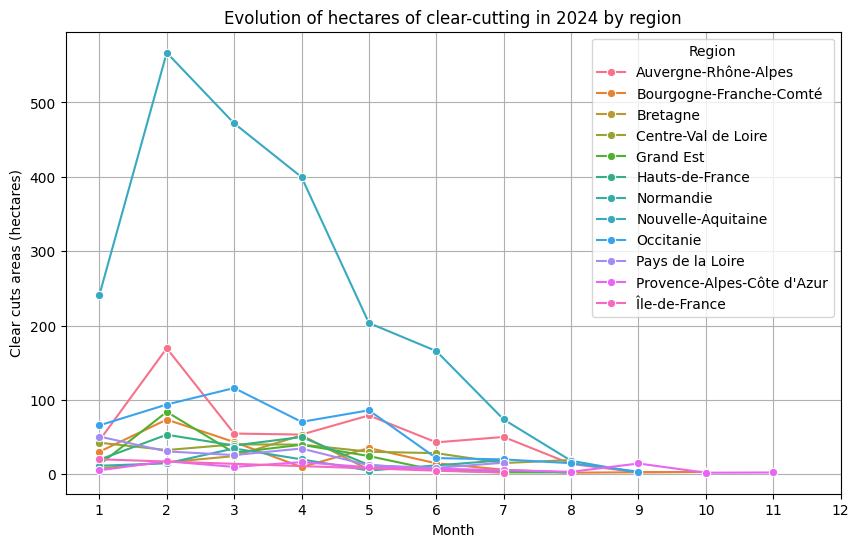

In [52]:

abusive_clear_cuts["month"] = abusive_clear_cuts["date_min"].dt.month  

# group month and regions and additionning hectares 
hectares_per_month_region = abusive_clear_cuts.groupby(["month", "nom_region"])["area_ha"].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=hectares_per_month_region, x="month", y="area_ha", hue="nom_region", marker="o")


plt.title("Evolution of hectares of clear-cutting in 2024 by region")
plt.xlabel("Month")
plt.ylabel("Clear cuts areas (hectares)")
plt.xticks(range(1, 13))  
plt.legend(title="Region")
plt.grid(True)
#saving the plot
file_path = os.path.join(output_dir, "Evolution_area_clear_cuts_2024_per_region.png")
plt.savefig(file_path, dpi=300)
plt.show()


In [53]:
# Counting clear cuts types per regions
counts_per_regions = abusive_clear_cuts.groupby("code_region").agg(
    total=("area_ha", "count"),
    sum_area_ha=("area_ha", "sum"),
    nb_10_ha=("area_ha", lambda x: (x >= 10).sum()),
    nb_natura_2000=("natura2000_area_ha", lambda x: (x >=2).sum()),
    nb_slope_30=("slope30_area_ha", lambda x: (x >= 2).sum()),
    # Add overlaps between multiple criteria
    overlap_10ha_natura2000=("area_ha", lambda x: ((x >= 10) & (abusive_clear_cuts.loc[x.index, "natura2000_area_ha"] >=2) & (abusive_clear_cuts.loc[x.index, "slope30_area_ha"] < 2)).sum()),  # Overlap between area >= 10ha and Natura 2000 >=2ha
    overlap_10ha_slope30=("area_ha", lambda x: ((x >= 10)& (abusive_clear_cuts.loc[x.index, "natura2000_area_ha"] <2) & (abusive_clear_cuts.loc[x.index, "slope30_area_ha"] >= 2)).sum()),  # Overlap between area >= 10ha and slope >= 30%
    overlap_natura2000_slope30=("area_ha", lambda x: ((x < 10) & (abusive_clear_cuts.loc[x.index, "natura2000_area_ha"] >=2) & (abusive_clear_cuts.loc[x.index, "slope30_area_ha"] >= 2)).sum()),  # Overlap between Natura 2000 >=2ha and slope >= 30%
    
    # Add the triple overlap (area >= 10ha and Natura 2000 >=2ha and slope >= 30%)
    overlap_triple=("area_ha", lambda x: ((x >= 10) & 
                                               (abusive_clear_cuts.loc[x.index, "natura2000_area_ha"] >=2) & 
                                               (abusive_clear_cuts.loc[x.index, "slope30_area_ha"] >= 2)).sum())  # Triple overlap
).reset_index()
counts_per_regions


,code_region,total,sum_area_ha,nb_10_ha,nb_natura_2000,nb_slope_30,overlap_10ha_natura2000,overlap_10ha_slope30,overlap_natura2000_slope30,overlap_triple
0,11,6,27.140104,0,6,0,0,0,0,0
1,24,64,247.490984,3,61,0,0,0,0,0
2,27,50,217.810844,5,40,8,1,0,2,0
3,28,16,104.420312,5,13,1,1,0,0,1
4,32,24,182.810571,9,15,0,0,0,0,0
5,44,40,199.710700,7,28,7,2,0,0,0
6,52,36,177.590700,5,33,0,2,0,0,0
7,53,16,106.440347,4,13,1,2,0,0,0
8,75,204,2142.065307,113,84,12,4,0,1,0
9,76,86,491.541714,11,32,51,0,2,6,0


In [ ]:
 #preparing data to map the region 
regions: gpd.GeoDataFrame = gpd.read_file("../analytics/data/RegionsMetropole.geojson")
regions['DREG_C_COD'] = regions['DREG_C_COD'].astype(int)

#merging datasets
map_regions = regions.merge(counts_per_regions, left_on="DREG_C_COD", right_on="code_region", how="left")
map_regions=map_regions.rename(columns={"DREG_C_COD" : "region_code","DREG_L_LIB":"region_name"})
map_regions

,region_code,region_name,geometry,code_region,total,sum_area_ha,nb_10_ha,nb_natura_2000,nb_slope_30,overlap_10ha_natura2000,overlap_10ha_slope30,overlap_natura2000_slope30,overlap_triple
0,11,Île-de-France,"POLYGON ((3.55569 48.61696, 3.55561 48.62028, ...",11.0,6.0,27.140104,0.0,6.0,0.0,0.0,0.0,0.0,0.0
1,24,Centre-Val de Loire,"POLYGON ((3.12823 47.97968, 3.12237 47.98528, ...",24.0,64.0,247.490984,3.0,61.0,0.0,0.0,0.0,0.0,0.0
2,27,Bourgogne-Franche-Comté,"POLYGON ((7.14217 47.52502, 7.14217 47.52502, ...",27.0,50.0,217.810844,5.0,40.0,8.0,1.0,0.0,2.0,0.0
3,28,Normandie,"MULTIPOLYGON (((0.29722 49.42986, 0.2856 49.42...",28.0,16.0,104.420312,5.0,13.0,1.0,1.0,0.0,0.0,1.0
4,32,Hauts-de-France,"POLYGON ((4.1409 49.97876, 4.1409 49.97876, 4....",32.0,24.0,182.810571,9.0,15.0,0.0,0.0,0.0,0.0,0.0
5,44,Grand Est,"POLYGON ((5.88473 47.92605, 5.88473 47.92605, ...",44.0,40.0,199.710700,7.0,28.0,7.0,2.0,0.0,0.0,0.0
6,52,Pays de la Loire,"MULTIPOLYGON (((0.91665 48.13894, 0.90961 48.1...",52.0,36.0,177.590700,5.0,33.0,0.0,2.0,0.0,0.0,0.0
7,53,Bretagne,"MULTIPOLYGON (((-1.0182 48.00152, -1.02141 48....",53.0,16.0,106.440347,4.0,13.0,1.0,2.0,0.0,0.0,0.0
8,75,Nouvelle-Aquitaine,"MULTIPOLYGON (((1.21307 46.43308, 1.20335 46.4...",75.0,204.0,2142.065307,113.0,84.0,12.0,4.0,0.0,1.0,0.0
9,76,Occitanie,"MULTIPOLYGON (((1.78612 42.57362, 1.7696 42.56...",76.0,86.0,491.541714,11.0,32.0,51.0,0.0,2.0,6.0,0.0


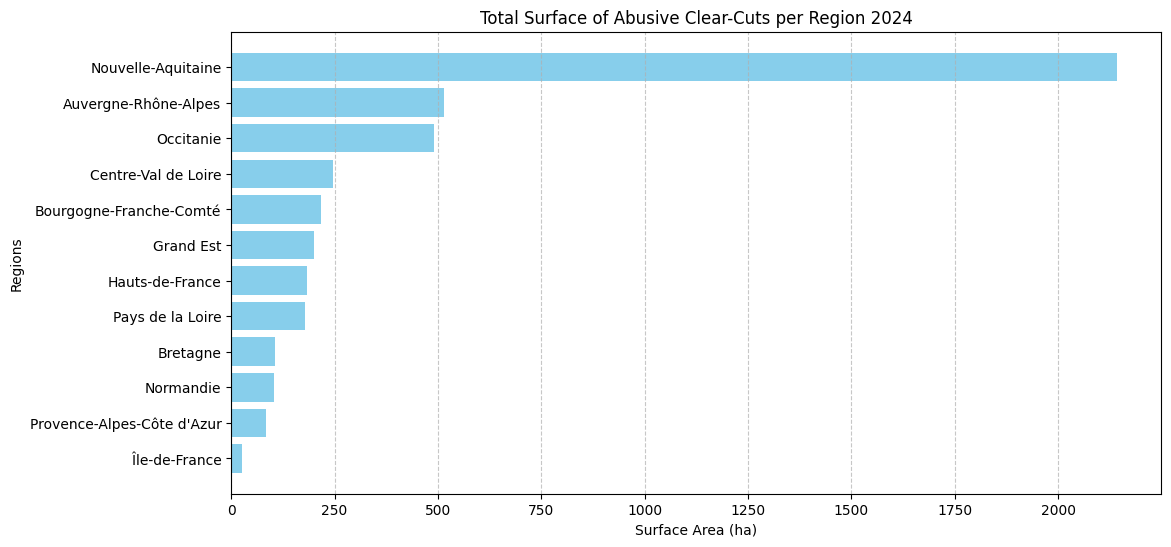

In [55]:
# graph bar per region
counts_per_regions = map_regions.sort_values(by="sum_area_ha", ascending=False)
plt.figure(figsize=(12, 6))
plt.barh(counts_per_regions["region_name"], counts_per_regions["sum_area_ha"], color="skyblue")
plt.xlabel("Surface Area (ha)")
plt.ylabel("Regions")
plt.title("Total Surface of Abusive Clear-Cuts per Region 2024")
plt.gca().invert_yaxis()  
plt.grid(axis="x", linestyle="--", alpha=0.7)
#saving the plot
file_path = os.path.join(output_dir, "graphbar_total_surface_per_region_2024.png")
plt.savefig(file_path, dpi=300)
# Affichage
plt.show()

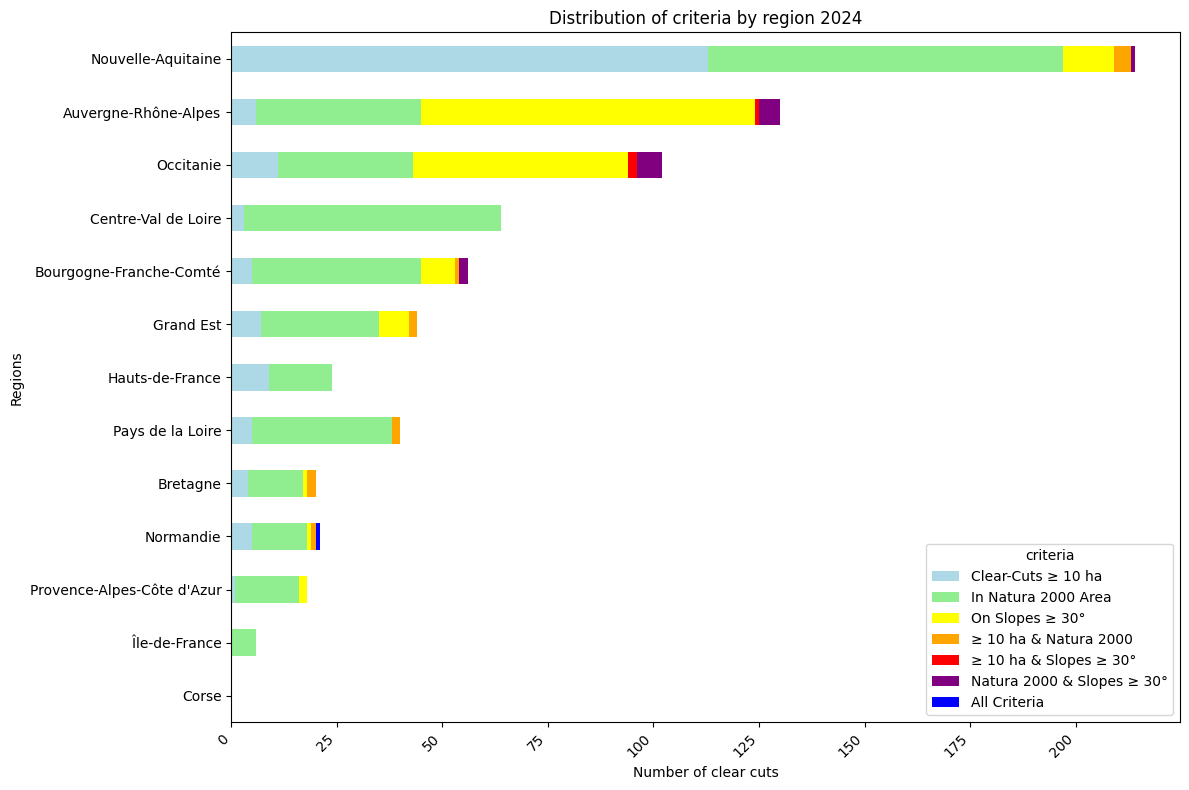

In [56]:
#graph bar per region types of clear cuts
counts_per_regions = map_regions.sort_values(by="sum_area_ha", ascending=False)
stacked_data = counts_per_regions[[
       'nb_10_ha', 
    'nb_natura_2000', 
    'nb_slope_30', 
    'overlap_10ha_natura2000',
    'overlap_10ha_slope30',
    'overlap_natura2000_slope30',
    'overlap_triple'
]]

stacked_data.index = counts_per_regions["region_name"]

legend_labels = {
    'nb_10_ha': "Clear-Cuts ≥ 10 ha",
    'nb_natura_2000': "In Natura 2000 Area",
    'nb_slope_30': "On Slopes ≥ 30°",
    'overlap_10ha_natura2000': "≥ 10 ha & Natura 2000",
    'overlap_10ha_slope30': "≥ 10 ha & Slopes ≥ 30°",
    'overlap_natura2000_slope30': "Natura 2000 & Slopes ≥ 30°",
    'overlap_triple': "All Criteria"
}

# rename columns
stacked_data = stacked_data.rename(columns=legend_labels)

#graph (stacked bars)
fig, ax = plt.subplots(figsize=(12, 8))

stacked_data.plot(kind='barh', stacked=True, ax=ax, color=['lightblue', 'lightgreen', 'yellow', 'orange', 'red', 'purple', 'blue'])

ax.set_xlabel('Number of clear cuts')
ax.set_ylabel('Regions')
ax.set_title('Distribution of criteria by region 2024')

ax.legend(title="criteria")

plt.xticks(rotation=45, ha='right')

plt.gca().invert_yaxis()  

plt.tight_layout()
#saving the plot
file_path = os.path.join(output_dir, "criteria_per_region_2024.png")
plt.savefig(file_path, dpi=300)
plt.show()

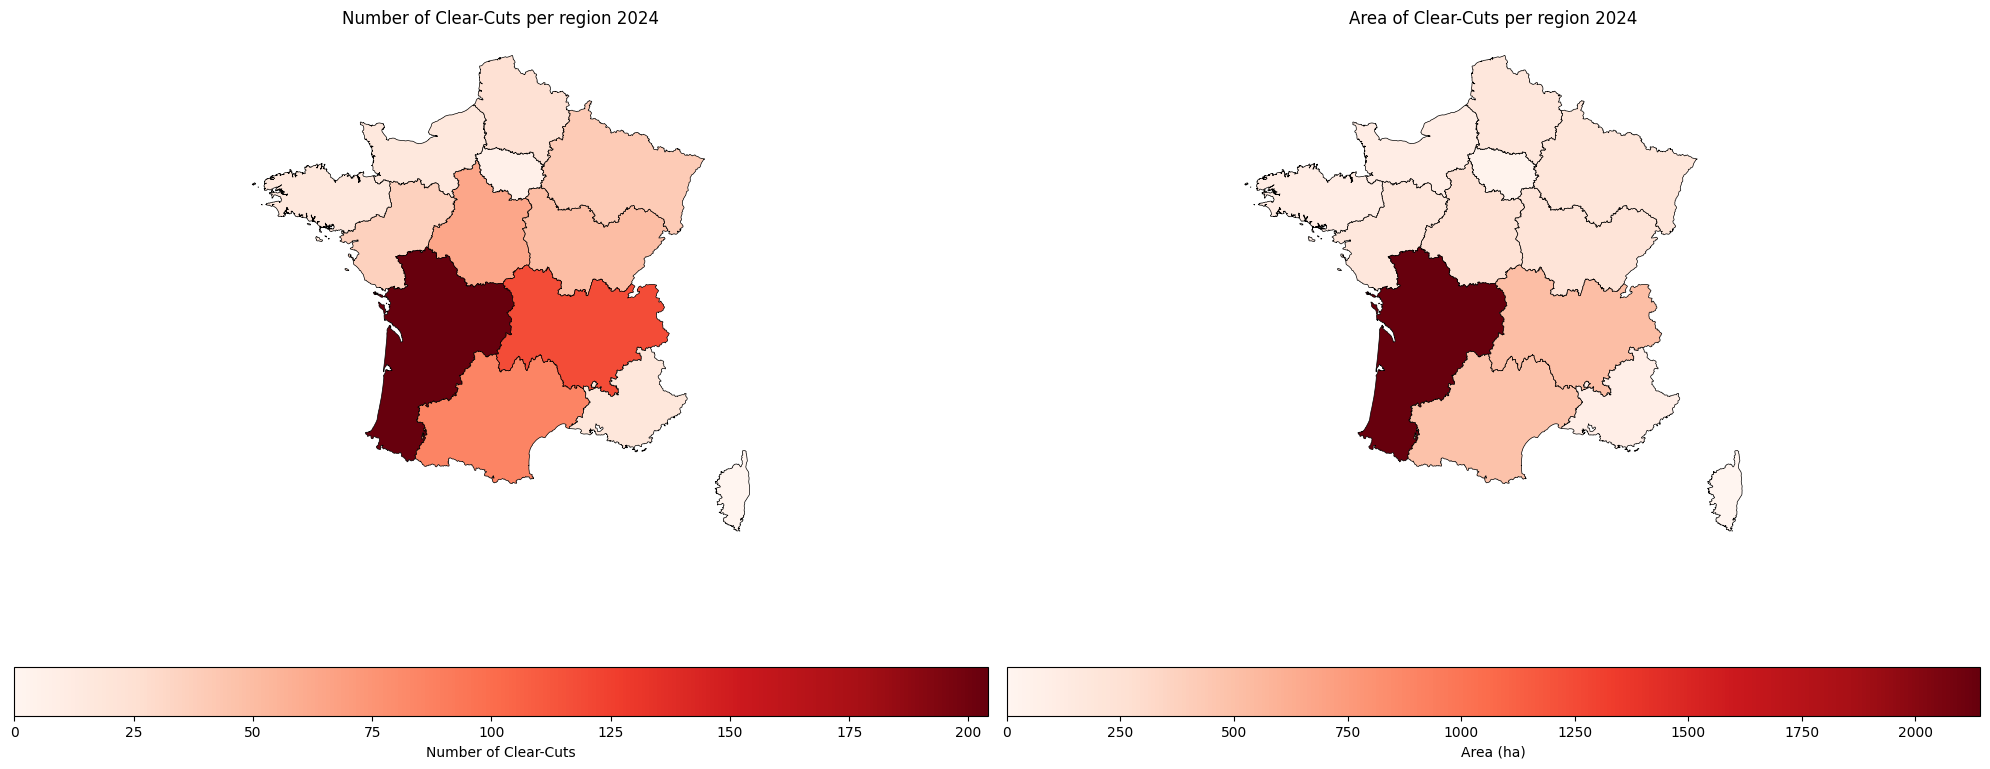

In [57]:
#replacing missing value per 0 for the map 
map_regions['total'] = map_regions['total'].fillna(0)
map_regions['sum_area_ha'] = map_regions['sum_area_ha'].fillna(0)
#Maps : nbr and surface of clear cuts per department
fig, axes = plt.subplots(1, 2, figsize=(20, 8)) 
#creating choropleth map : number of clear cuts per departement
map_regions.plot(column="total", cmap="Reds", linewidth=0.5, edgecolor="black",
            legend=True, legend_kwds={"label": "Number of Clear-Cuts", "orientation": "horizontal"}, ax=axes[0])
axes[0].set_title("Number of Clear-Cuts per region 2024")
axes[0].axis("off")

#creating choropleth map : size of clear cuts per departement
map_regions.plot(column="sum_area_ha", cmap="Reds", linewidth=0.5, edgecolor="black",
            legend=True, legend_kwds={"label": "Area (ha)", "orientation": "horizontal"}, ax=axes[1])

axes[1].set_title("Area of Clear-Cuts per region 2024")
axes[1].axis("off")

# Ajustement de la mise en page
plt.tight_layout()

##saving the plot
file_path = os.path.join(output_dir, "Maps_nbr_surface_clear_cuts_region_2024.png")
plt.savefig(file_path, dpi=300)
plt.show()

# Clear cuts per department 

In [58]:
# Counting clear cuts types per departements
counts_per_dpt = abusive_clear_cuts.groupby("department_code_insee").agg(
    total=("area_ha", "count"),
    sum_area_ha=("area_ha", "sum"),
    nb_10_ha=("area_ha", lambda x: (x >= 10).sum()),
    nb_natura_2000=("natura2000_area_ha", lambda x: (x >=2).sum()),
    nb_slope_30=("slope30_area_ha", lambda x: (x >= 2).sum()),
    # Add overlaps between multiple criteria
    overlap_10ha_natura2000=("area_ha", lambda x: ((x >= 10) & (abusive_clear_cuts.loc[x.index, "natura2000_area_ha"] >=2) & (abusive_clear_cuts.loc[x.index, "slope30_area_ha"] < 2)).sum()),  # Overlap between area >= 10ha and Natura 2000 >=2ha
    overlap_10ha_slope30=("area_ha", lambda x: ((x >= 10)& (abusive_clear_cuts.loc[x.index, "natura2000_area_ha"] <2) & (abusive_clear_cuts.loc[x.index, "slope30_area_ha"] >= 2)).sum()),  # Overlap between area >= 10ha and slope >= 30%
    overlap_natura2000_slope30=("area_ha", lambda x: ((x < 10) & (abusive_clear_cuts.loc[x.index, "natura2000_area_ha"] >=2) & (abusive_clear_cuts.loc[x.index, "slope30_area_ha"] >= 2)).sum()),  # Overlap between Natura 2000 >=2ha and slope >= 30%
    
    # Add the triple overlap (area >= 10ha and Natura 2000 >=2ha and slope >= 30%)
    overlap_triple=("area_ha", lambda x: ((x >= 10) & 
                                               (abusive_clear_cuts.loc[x.index, "natura2000_area_ha"] >=2) & 
                                               (abusive_clear_cuts.loc[x.index, "slope30_area_ha"] >= 2)).sum())  # Triple overlap
).reset_index()

counts_per_dpt

,department_code_insee,total,sum_area_ha,nb_10_ha,nb_natura_2000,nb_slope_30,overlap_10ha_natura2000,overlap_10ha_slope30,overlap_natura2000_slope30,overlap_triple
0,01,12,47.870182,1,9,2,0,0,0,0
1,02,12,93.970286,5,7,0,0,0,0,0
2,03,5,25.920089,1,3,2,0,1,0,0
3,04,4,24.310080,1,2,1,0,0,0,0
4,05,3,15.040057,0,2,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
74,82,3,12.750061,0,2,1,0,0,0,0
75,83,2,12.850061,0,2,0,0,0,0,0
76,85,1,2.520014,0,1,0,0,0,0,0
77,86,5,44.730139,1,4,0,0,0,0,0


In [59]:
#preparing data to map the departement 
dpt: gpd.GeoDataFrame = gpd.read_file("../analytics/data/cadastre/cadastre_france_departments.fgb")
dpt
#merging datasets
map_dpt = dpt.merge(counts_per_dpt, left_on="code_insee", right_on="department_code_insee", how="left")
map_dpt=map_dpt.rename(columns={"code_insee" : "dpt_code","name":"dpt_name"})
map_dpt

,dpt_code,dpt_name,geometry,department_code_insee,total,sum_area_ha,nb_10_ha,nb_natura_2000,nb_slope_30,overlap_10ha_natura2000,overlap_10ha_slope30,overlap_natura2000_slope30,overlap_triple
0,2A,Corse-du-Sud,"MULTIPOLYGON (((1157716.68 6142364.344, 115774...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2B,Haute-Corse,"MULTIPOLYGON (((1159416.005 6158689.756, 11594...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,83,Var,"MULTIPOLYGON (((914567.676 6279020.989, 914575...",83,2.0,12.850061,0.0,2.0,0.0,0.0,0.0,0.0,0.0
3,34,Hérault,"MULTIPOLYGON (((662645.732 6249747.417, 662666...",34,7.0,43.760148,1.0,2.0,4.0,0.0,0.0,0.0,0.0
4,13,Bouches-du-Rhône,"MULTIPOLYGON (((799594.601 6263150.832, 799602...",13,8.0,30.660133,0.0,8.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,31,Haute-Garonne,"MULTIPOLYGON (((491715.551 6229117.37, 492178....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,81,Tarn,"MULTIPOLYGON (((582445.189 6318934.642, 582462...",81,24.0,158.230553,4.0,2.0,20.0,0.0,1.0,1.0,0.0
94,11,Aude,"MULTIPOLYGON (((593491.217 6242495.488, 593597...",11,8.0,49.800177,1.0,5.0,3.0,0.0,0.0,1.0,0.0
95,09,Ariège,"MULTIPOLYGON (((522392.652 6204087.047, 522457...",09,7.0,37.530151,1.0,3.0,3.0,0.0,0.0,0.0,0.0


Maps number and area of clear cuts per departments

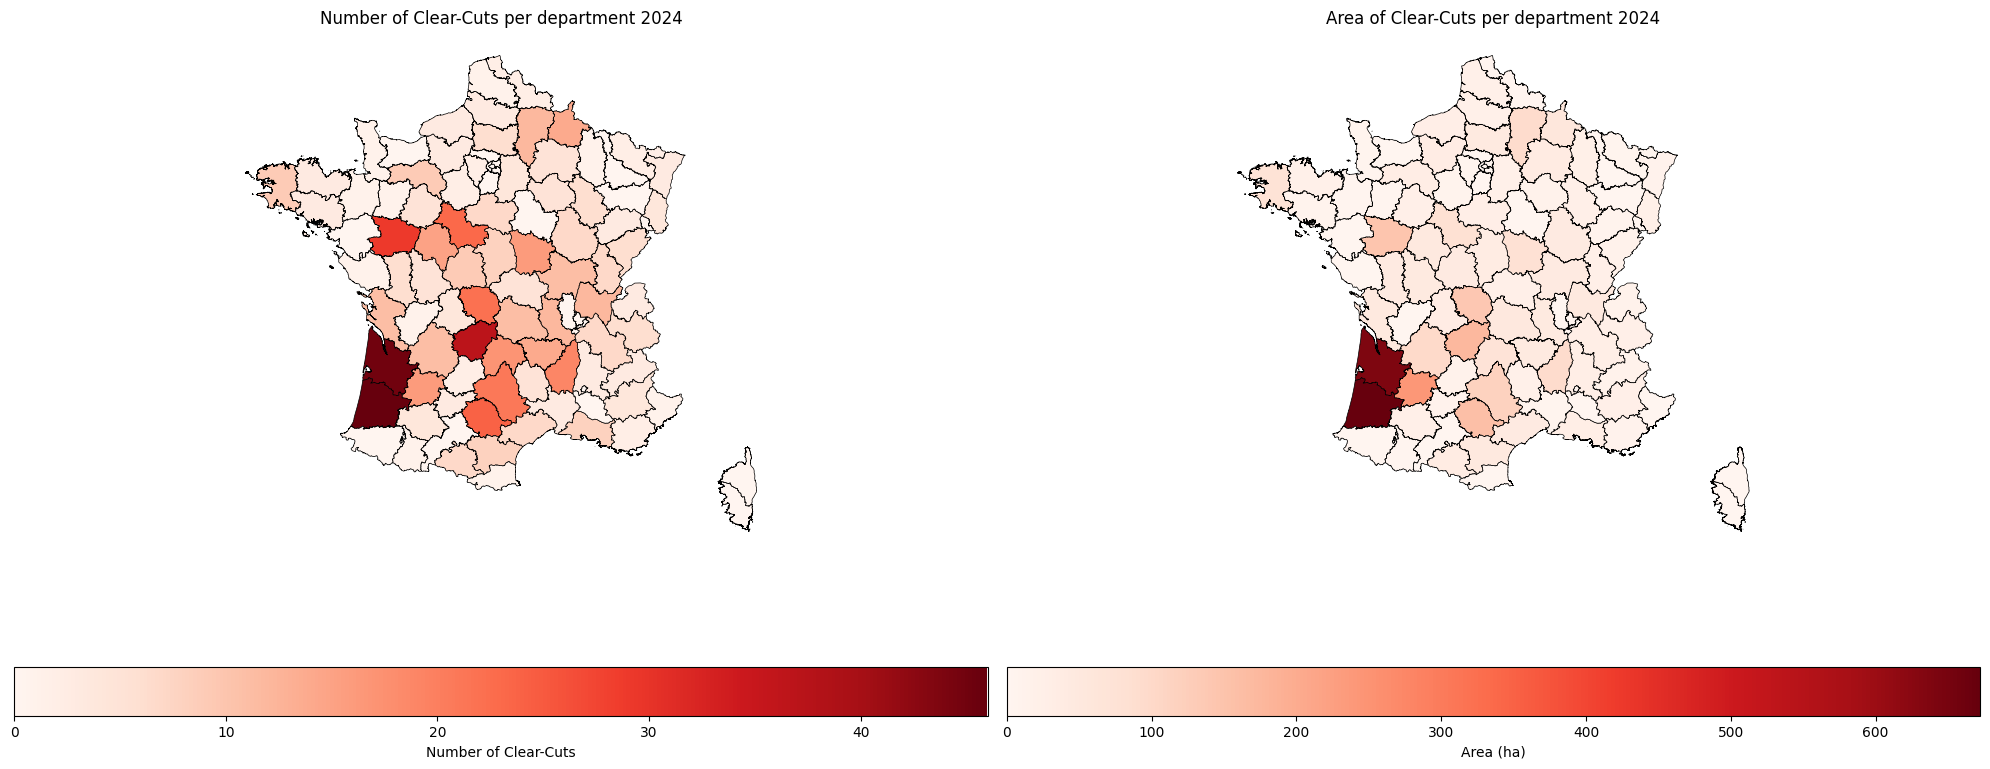

In [60]:
#replacing missing value per 0 for the map 
map_dpt['total'] = map_dpt['total'].fillna(0)
map_dpt['sum_area_ha'] = map_dpt['sum_area_ha'].fillna(0)
#Maps : nbr and surface of clear cuts per department
fig, axes = plt.subplots(1, 2, figsize=(20, 8)) 
#creating choropleth map : number of clear cuts per departement
map_dpt.plot(column="total", cmap="Reds", linewidth=0.5, edgecolor="black",
            legend=True, legend_kwds={"label": "Number of Clear-Cuts", "orientation": "horizontal"}, ax=axes[0])
axes[0].set_title("Number of Clear-Cuts per department 2024")
axes[0].axis("off")

#creating choropleth map : size of clear cuts per departement
map_dpt.plot(column="sum_area_ha", cmap="Reds", linewidth=0.5, edgecolor="black",
            legend=True, legend_kwds={"label": "Area (ha)", "orientation": "horizontal"}, ax=axes[1])

axes[1].set_title("Area of Clear-Cuts per department 2024")
axes[1].axis("off")

# Ajustement de la mise en page
plt.tight_layout()

##saving the plot
file_path = os.path.join(output_dir, "Maps_nbr_surface_clear_cuts_2024.png")
plt.savefig(file_path, dpi=300)
# Affichage
plt.show()

c:\Users\User\AppData\Local\pypoetry\Cache\virtualenvs\python-template-vFWxdPwD-py3.13\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


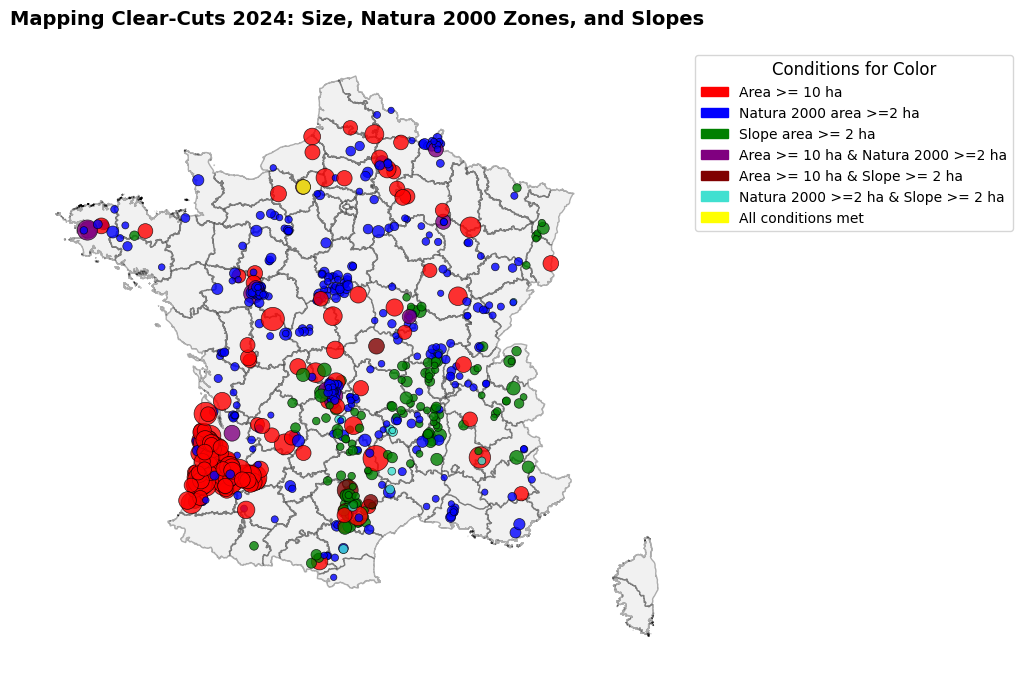

In [61]:
#map with slope, size and natura 2000  
fig, ax = plt.subplots(figsize=(15, 8))

# Draw the map of departments
map_dpt.plot(ax=ax, color="lightgrey", edgecolor="black", alpha=0.3)

# Define colors
conditions = [
    (abusive_clear_cuts["area_ha"] >= 10) & (abusive_clear_cuts["natura2000_area_ha"] <2) & (abusive_clear_cuts["slope30_area_ha"] < 2),
    (abusive_clear_cuts["natura2000_area_ha"] >=2) & (abusive_clear_cuts["area_ha"] < 10) & (abusive_clear_cuts["slope30_area_ha"] < 2),
    (abusive_clear_cuts["slope30_area_ha"] >= 2) & (abusive_clear_cuts["natura2000_area_ha"] <2) & (abusive_clear_cuts["area_ha"] < 10),
    (abusive_clear_cuts["area_ha"] >= 10) & (abusive_clear_cuts["natura2000_area_ha"] >=2) & (abusive_clear_cuts["slope30_area_ha"] < 2),
    (abusive_clear_cuts["area_ha"] >= 10) & (abusive_clear_cuts["natura2000_area_ha"] <2) & (abusive_clear_cuts["slope30_area_ha"] >= 2),
    (abusive_clear_cuts["area_ha"] < 10) & (abusive_clear_cuts["natura2000_area_ha"] >=2) & (abusive_clear_cuts["slope30_area_ha"] >= 2),
    (abusive_clear_cuts["area_ha"] >= 10) & (abusive_clear_cuts["natura2000_area_ha"] >=2) & (abusive_clear_cuts["slope30_area_ha"] >= 2),
]

colors = ["red", "blue", "green", "purple", "maroon", "turquoise", "yellow"]

abusive_clear_cuts["color"] = np.select(conditions, colors, default="gray")

scatter = ax.scatter(
    abusive_clear_cuts.centroid_x, abusive_clear_cuts.centroid_y, 
    s=abusive_clear_cuts["area_ha"] * 10, 
    c=abusive_clear_cuts["color"],   
    alpha=0.8, 
    edgecolors="black", 
    linewidth=0.5
)
#legend
legend_patches = [
    mpatches.Patch(color="red", label="Area >= 10 ha"),
    mpatches.Patch(color="blue", label="Natura 2000 area >=2 ha"),
    mpatches.Patch(color="green", label="Slope area >= 2 ha"),
    mpatches.Patch(color="purple", label="Area >= 10 ha & Natura 2000 >=2 ha"),
    mpatches.Patch(color="maroon", label="Area >= 10 ha & Slope >= 2 ha"),
    mpatches.Patch(color="turquoise", label="Natura 2000 >=2 ha & Slope >= 2 ha"),
    mpatches.Patch(color="yellow", label="All conditions met"),
]

ax.legend(
    handles=legend_patches, 
    title="Conditions for Color", 
    loc="upper left", 
    bbox_to_anchor=(1, 1),  
    title_fontsize=12,  
    fontsize=10, 
    fancybox=True
)

#title
ax.set_title("Mapping Clear-Cuts 2024: Size, Natura 2000 Zones, and Slopes", fontsize=14, fontweight="bold")
ax.axis("off")  
#saving the plot
file_path = os.path.join(output_dir, "Maps_clear_cuts_2024_area_size_slope_natura2000.png")
plt.savefig(file_path)
plt.show()

In [62]:
#saving all dataframes into excel sheets 
#dropping irrelevant columns
map_regions
stats_region=map_regions.drop(["geometry", "code_region"], axis=1) 

stat_dpt=map_dpt.drop(["geometry","department_code_insee"], axis=1)
stat_dpt
with pd.ExcelWriter(excel_file_general_stat_2024, engine='openpyxl') as writer:
     stats.to_excel(writer, sheet_name='General_statistics_2024', index=True)
     stats_region.to_excel(writer, sheet_name='Regions', index=False)
     stat_dpt.to_excel(writer, sheet_name='Departments', index=False)



# additional statistics Natura 2000

In [63]:
#selecting clear cuts if natura 2000 area >0
natura2000_clear_cuts: gpd.GeoDataFrame = clear_cuts[clear_cuts["natura2000_area_ha"] >0]
natura2000_clear_cuts

,date_min,date_max,days_delta,clear_cut_group_size,area_ha,natura2000_area_ha,slope30_area_ha,department_code_insee,city_code_insee,centroid_x,centroid_y,representative_point_x,representative_point_y,geometry,code_departement,nom_departement,code_region,nom_region
4,2024-01-22,2024-04-03,72,6,0.500004,0.500004,0.000000,2B,2B123,1.236758e+06,6.125014e+06,1.236755e+06,6.125012e+06,"MULTIPOLYGON (((1236779.689 6124966.697, 12367...",2B,Haute-Corse,94,Corse
5,2024-06-01,2024-08-13,73,10,0.670007,0.670007,0.000000,2B,2B009,1.239028e+06,6.129418e+06,1.239050e+06,6.129422e+06,"MULTIPOLYGON (((1239009.688 6129356.697, 12389...",2B,Haute-Corse,94,Corse
19,2024-06-02,2024-08-01,60,14,0.820005,0.820005,0.000000,2B,2B290,1.190000e+06,6.185058e+06,1.190005e+06,6.185057e+06,"MULTIPOLYGON (((1189969.689 6185006.697, 11899...",2B,Haute-Corse,94,Corse
23,2024-03-21,2024-09-18,181,22,1.340009,0.008271,0.000000,2B,2B009,1.238301e+06,6.131956e+06,1.238310e+06,6.131967e+06,"MULTIPOLYGON (((1238159.689 6131906.697, 12381...",2B,Haute-Corse,94,Corse
29,2024-01-21,2024-01-27,6,5,0.640004,0.640004,0.000000,2B,2B346,1.235891e+06,6.180297e+06,1.235895e+06,6.180292e+06,"MULTIPOLYGON (((1235929.689 6180266.697, 12359...",2B,Haute-Corse,94,Corse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18496,2024-04-03,2024-09-12,162,20,1.190008,0.379821,0.054707,64,64504,3.261412e+05,6.253813e+06,3.261347e+05,6.253817e+06,"MULTIPOLYGON (((326049.689 6253756.697, 326049...",64,Pyrénées-Atlantiques,75,Nouvelle-Aquitaine
18497,2024-04-08,2024-11-11,217,13,0.830005,0.124583,0.000000,64,64495,3.313989e+05,6.259533e+06,3.313997e+05,6.259527e+06,"MULTIPOLYGON (((331369.689 6259456.697, 331369...",64,Pyrénées-Atlantiques,75,Nouvelle-Aquitaine
18498,2024-08-01,2024-09-24,54,14,0.680006,0.287286,0.123943,64,64495,3.329729e+05,6.256867e+06,3.329597e+05,6.256867e+06,"MULTIPOLYGON (((332929.689 6256806.697, 332929...",64,Pyrénées-Atlantiques,75,Nouvelle-Aquitaine
18499,2024-04-21,2024-11-06,199,15,0.820005,0.631942,0.000000,64,64504,3.277902e+05,6.253615e+06,3.277947e+05,6.253617e+06,"MULTIPOLYGON (((327739.688 6253586.697, 327729...",64,Pyrénées-Atlantiques,75,Nouvelle-Aquitaine


In [64]:
#creating EXCEL output file
excel_file_natura2000 = "../analytics/output/clear_cuts_natura2000_2024.xlsx"

Stat des 

In [65]:

stats_natura2000 = natura2000_clear_cuts[["area_ha", "natura2000_area_ha"]].describe()

def custom_round(val):
    if isinstance(val, (int, float)):
        return f"{int(val)}" if val % 1 == 0 else f"{val:.6f}"
    return val  # en cas de string ou NaN

stats_natura2000 = stats_natura2000.applymap(custom_round)
stats_natura2000

C:\Users\User\AppData\Local\Temp\ipykernel_21928\3729178204.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  stats_natura2000 = stats_natura2000.applymap(custom_round)


,area_ha,natura2000_area_ha
count,2475,2475
mean,1.705629,1.224266
std,2.035931,1.421016
min,0.500003,0.000005
25%,0.690005,0.544331
50%,1.040010,0.810006
75%,1.895011,1.445009
max,34.030069,19.380030


In [66]:

sum_area_ha = natura2000_clear_cuts["area_ha"].sum()
mean_area_ha = natura2000_clear_cuts["area_ha"].mean()
sum_natura2000_area_ha = natura2000_clear_cuts["natura2000_area_ha"].sum()
mean_natura2000_area_ha = natura2000_clear_cuts["natura2000_area_ha"].mean()
nb_natura_2000 = (natura2000_clear_cuts["natura2000_area_ha"] > 0).sum()
nb_natura_2000_0_5a = (natura2000_clear_cuts["natura2000_area_ha"] >= 0.5).sum()
nb_natura_2000_2ha = (natura2000_clear_cuts["natura2000_area_ha"] >= 2).sum()


stats_france_natura2000 = pd.DataFrame({
    "Metric": [
        "Nb clear cuts Natura2000", "Nb clear cuts Natura2000 >= 0.5ha", "Nb clear cuts Natura2000 >= 2ha", "Sum area (ha)", "Mean area (ha)", 
        "Sum Natura2000 area (ha)", "Mean Natura2000 area (ha)"
        
    ],
    "Value": [
        nb_natura_2000, nb_natura_2000_0_5a, nb_natura_2000_2ha, sum_area_ha, mean_area_ha, 
        sum_natura2000_area_ha, mean_natura2000_area_ha
    ]
})
stats_france_natura2000


,Metric,Value
0,Nb clear cuts Natura2000,2475.000000
1,Nb clear cuts Natura2000 >= 0.5ha,2027.000000
2,Nb clear cuts Natura2000 >= 2ha,379.000000
3,Sum area (ha),4221.431408
4,Mean area (ha),1.705629
5,Sum Natura2000 area (ha),3030.058818
6,Mean Natura2000 area (ha),1.224266


In [67]:
#stats per région
# Counting clear cuts types per regions
counts_per_regions_natura2000 = natura2000_clear_cuts.groupby("nom_region").agg(
    nb_clear_cuts_natura_2000=("natura2000_area_ha", lambda x: (x > 0).sum()),
    nb_clear_cuts_natura_2000_0_5a=("natura2000_area_ha", lambda x: (x >= 0.5).sum()),
    nb_clear_cuts_natura_2000_2ha=("natura2000_area_ha", lambda x: (x >= 2).sum()),
    sum_area_ha=("area_ha", "sum"),
    mean_area_ha=("area_ha", "mean"),
    sum_natura2000_area_ha=("natura2000_area_ha", "sum"),
    mean_natura2000_area_ha=("natura2000_area_ha", "mean"))
counts_per_regions_natura2000

,nb_clear_cuts_natura_2000,nb_clear_cuts_natura_2000_0_5a,nb_clear_cuts_natura_2000_2ha,sum_area_ha,mean_area_ha,sum_natura2000_area_ha,mean_natura2000_area_ha
nom_region,,,,,,,
Auvergne-Rhône-Alpes,369,277,39,513.212757,1.390820,346.742604,0.939682
Bourgogne-Franche-Comté,271,246,40,367.192032,1.354952,332.359568,1.226419
Bretagne,69,46,13,138.790654,2.011459,99.077934,1.435912
Centre-Val de Loire,293,280,61,461.062520,1.573592,421.204088,1.437557
Corse,5,4,0,3.970028,0.794006,2.638290,0.527658
Grand Est,175,151,28,266.331426,1.521894,221.680928,1.266748
Hauts-de-France,91,70,15,163.060859,1.791878,114.063061,1.253440
Normandie,65,50,13,131.070638,2.016471,99.014414,1.523299
Nouvelle-Aquitaine,625,441,84,1362.226067,2.179562,699.927096,1.119883


In [68]:
#stats per dptm
# Counting clear cuts types per dptm
counts_per_dpt_natura2000 = natura2000_clear_cuts.groupby("nom_departement").agg(
    nb_clear_cuts_natura_2000=("natura2000_area_ha", lambda x: (x > 0).sum()),
    nb_clear_cuts_natura_2000_0_5a=("natura2000_area_ha", lambda x: (x >= 0.5).sum()),
    nb_clear_cuts_natura_2000_2ha=("natura2000_area_ha", lambda x: (x >= 2).sum()),
    sum_area_ha=("area_ha", "sum"),
    mean_area_ha=("area_ha", "mean"),
    sum_natura2000_area_ha=("natura2000_area_ha", "sum"),
    mean_natura2000_area_ha=("natura2000_area_ha", "mean"))

counts_per_dpt_natura2000

,nb_clear_cuts_natura_2000,nb_clear_cuts_natura_2000_0_5a,nb_clear_cuts_natura_2000_2ha,sum_area_ha,mean_area_ha,sum_natura2000_area_ha,mean_natura2000_area_ha
nom_departement,,,,,,,
Ain,53,39,9,75.310423,1.420951,54.935846,1.036525
Aisne,31,28,7,58.600290,1.890332,52.143710,1.682055
Allier,24,18,3,27.810159,1.158757,18.617499,0.775729
Alpes-Maritimes,8,7,1,8.990058,1.123757,7.802401,0.975300
Alpes-de-Haute-Provence,24,22,2,30.170205,1.257092,26.980035,1.124168
...,...,...,...,...,...,...,...
Vendée,19,18,1,17.880131,0.941060,17.339241,0.912592
Vienne,14,13,4,27.430136,1.959295,27.086444,1.934746
Vosges,15,5,0,16.860094,1.124006,5.567133,0.371142


In [69]:
#saving all dataframes into excel sheets 
with pd.ExcelWriter(excel_file_natura2000, engine='openpyxl') as writer:
    stats_natura2000.to_excel(writer, sheet_name='General statistics', index=True)
    stats_france_natura2000.to_excel(writer, sheet_name='Mainland France', index=False)
    counts_per_regions_natura2000.to_excel(writer, sheet_name='Regions', index=True)
    counts_per_dpt_natura2000.to_excel(writer, sheet_name='Departments', index=True)

